In [70]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import cm
import matplotlib.pyplot as plot
import matplotlib.backends.backend_pdf
import matplotlib.patches as mpatches

In [71]:
# Dataset from: https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days
covid_df = pd.read_csv('datasets/Covid-Data.csv').drop([0,1])
new_header = covid_df.iloc[0]
covid_df = covid_df[1:]
covid_df.columns = new_header
covid_df = covid_df.sort_values('State/Territory')
covid_df.rename(columns={'State/Territory': 'state', 'Case Rate per 100000': 'case rate per 100000'}, inplace=True)
display(covid_df)

2,state,Total Cases,Confirmed Cases,Probable Cases,Cases in Last 7 Days,case rate per 100000,Total Deaths,Confirmed Deaths,Probable Deaths,Deaths in Last 7 Days,Death Rate per 100000,Case Rate per 100000 in Last 7 Days,Death Rate per 100K in Last 7 Days
4,Alabama,225910,189461,36449,15273,4622,3419,3123,296,206,69,44.6,0.6
3,Alaska,24909,NaN,NaN,4221,3378,100,NaN,NaN,4,13,81.8,0.1
6,American Samoa,3,NaN,NaN,0,5,0,NaN,NaN,0,0,0,0
7,Arizona,287225,279218,8007,20663,4005,6384,5919,465,144,89,41.2,0.3
5,Arkansas,139855,NaN,NaN,11849,4640,2297,NaN,NaN,153,76,56.2,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Virginia,213332,191972,21360,14069,2505,3912,3605,307,127,45,23.6,0.2
59,Washington,137411,NaN,NaN,14055,1824,2603,NaN,NaN,96,34,26.6,0.2
61,West Virginia,37399,32754,4645,6502,2071,623,NaN,NaN,68,34,51.4,0.5
60,Wisconsin,358113,338472,19641,48541,6160,3010,2876,134,389,51,119.3,1


In [72]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Republic of Marshall Islands': 'MH',
    'Palau': 'PW',
    'U.S. Minor Outlying Islands': 'UM',
    'Federated States of Micronesia': 'FM',
    'United States of America': 'US',
    'New York City': 'NYC'
}

inverted_dict = dict(map(reversed, us_state_abbrev.items()))

In [73]:
covid_cases_df = covid_df[['state', 'case rate per 100000']]
us_territories = ['AS', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI', 'UM', 'DC', 'FM', 'US', 'NYC']
for territory in us_territories:
    covid_cases_df = covid_cases_df[covid_cases_df['state'] != inverted_dict[territory]]
covid_cases_df.sort_values('state')
display(covid_cases_df)

2,state,case rate per 100000
4,Alabama,4622
3,Alaska,3378
7,Arizona,4005
5,Arkansas,4640
8,California,2678
9,Colorado,3210
10,Connecticut,2782
12,Delaware,3118
13,Florida,4231
15,Georgia,4156


In [74]:
for i in range(len(covid_cases_df)):
    covid_cases_df.iloc[i]['state'] = us_state_abbrev[covid_cases_df.iloc[i]['state']]
display(covid_cases_df)
print(len(covid_cases_df))

2,state,case rate per 100000
4,AL,4622
3,AK,3378
7,AZ,4005
5,AR,4640
8,CA,2678
9,CO,3210
10,CT,2782
12,DE,3118
13,FL,4231
15,GA,4156


50


In [75]:
# CSV manually made in Google Sheets while referencing https://www.270towin.com/
political_df = pd.read_csv('datasets/2020_Election_Results.csv').sort_values('state')
display(political_df)

,state,vote
1,AK,rep
0,AL,rep
3,AR,rep
2,AZ,dem
4,CA,dem
5,CO,dem
6,CT,dem
7,DE,dem
8,FL,rep
9,GA,dem


In [76]:
frames = [covid_cases_df.sort_values('state'), political_df.sort_values('state')]
merged_cases_df = pd.merge(covid_cases_df, political_df, left_on='state', right_on='state', how='left')
merged_cases_df = merged_cases_df.sort_values('state')
display(merged_cases_df)

,state,case rate per 100000,vote
1,AK,3378,rep
0,AL,4622,rep
3,AR,4640,rep
2,AZ,4005,dem
4,CA,2678,dem
5,CO,3210,dem
6,CT,2782,dem
7,DE,3118,dem
8,FL,4231,rep
9,GA,4156,dem


In [ ]:
merged_cases_df['case rate per 100000'] = pd.to_numeric(merged_cases_df['case rate per 100000'], errors='coerce')

In [ ]:
merged_cases_df['case rate per 100000'].plot(
    figsize=(20, 10), 
    kind='bar', 
    color=(merged_cases_df['vote'] == 'dem').map({True: 'b', False: 'r'})
).set_xticklabels(merged_cases_df.state);

In [ ]:
def filter_covid(covid_df, single_column):
    df = covid_df[['state', single_column]]
    df = df.rename(columns={single_column: single_column.lower()})
    
    us_territories = ['AS', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI', 'UM', 'DC', 'FM', 'US', 'NYC']
    for territory in us_territories:
        df = df[df['state'] != inverted_dict[territory]]
    df.sort_values('state')

    if len(df.iloc[0]['state']) > 2:
        for i in range(len(df)):
            df.iloc[i]['state'] = us_state_abbrev[df.iloc[i]['state']]

    frames = [df.sort_values('state'), political_df.sort_values('state')]
    df = pd.merge(df, political_df, left_on='state', right_on='state', how='left')
    df = df.sort_values('state')
    
    df[single_column.lower()] = pd.to_numeric(df[single_column.lower()], errors='coerce')  
    
    return df

In [ ]:
covid_total_cases_df = filter_covid(covid_df, 'Total Cases')
display(covid_total_cases_df)

In [ ]:
dem_sum = np.sum(covid_total_cases_df[covid_total_cases_df['vote'] == 'dem']['total cases'])
rep_sum = np.sum(covid_total_cases_df[covid_total_cases_df['vote'] == 'rep']['total cases'])
df = pd.DataFrame({'Total Cases': [dem_sum, rep_sum]},
                  index=['Democrat', 'Republican'])
plot = df.plot.pie(y='Total Cases', figsize=(5, 5), colors=['b','r'], legend=None)

In [ ]:
# Dataset from: https://covidtracking.com/data/download
time_covid_df = pd.read_csv('datasets/all-states-history.csv')
display(time_covid_df)

In [ ]:
def filter_covid_2(covid_df, columns):
    df = covid_df[[*columns]]
    for i in range(len(columns)):
        df = df.rename(columns={columns[i]: columns[i].lower()})
    
    us_territories = ['AS', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI', 'UM', 'DC', 'FM', 'US', 'NYC']
    for territory in us_territories:
        df = df[df['state'] != inverted_dict[territory]]
    df.sort_values('state')

    if len(df.iloc[0]['state']) > 2:
        for i in range(len(df)):
            df.iloc[i]['state'] = us_state_abbrev[df.iloc[i]['state']]

    frames = [df.sort_values('state'), political_df.sort_values('state')]
    df = pd.merge(df, political_df, left_on='state', right_on='state', how='left')
    df = df.sort_values('state')
    
    return df

In [ ]:
viral_time_df = filter_covid_2(time_covid_df, ['date', 'state', 'hospitalized',])
viral_time_df = viral_time_df[viral_time_df['hospitalized'].notna()]
viral_time_df['date'] = pd.to_datetime(viral_time_df['date'])
viral_time_df['hospitalized'] = pd.to_numeric(viral_time_df['hospitalized'], errors='coerce')  
display(viral_time_df)
print(len(viral_time_df[viral_time_df['state'] == 'AK']))
print(len(viral_time_df[viral_time_df['state'] == 'WI']))

In [116]:
df_list = []
for i, k in enumerate(us_state_abbrev):
    df_list.append(viral_time_df[viral_time_df['state'] == us_state_abbrev[k]].sort_values('date'))

In [ ]:
def generate_state_dict(vote):
    states_dict = {}
    counter = 0
    for temp_df in df_list:
        if not temp_df['state'].empty and len(temp_df['hospitalized'].to_list()) >= 200:
            if temp_df['vote'].iloc[0] == vote:
                states_dict[temp_df['state'].iloc[0]] = temp_df['hospitalized'].to_list()[:200]
                counter += 1
    return states_dict

In [ ]:
def generate_line_plot(vote):
    datelist = pd.date_range(start=datetime(2020,1,23), end=datetime.today(), periods=200).tolist()
    states_dict = generate_state_dict(vote)
    df = pd.DataFrame(states_dict, index=datelist)
    cmap = cm.get_cmap('winter') if vote == 'dem' else cm.get_cmap('autumn')
    return df.plot.line(figsize=(15, 10), cmap=cmap)

dem_line_plot = generate_line_plot('dem')
dem_line_plot.set_title('Number of Individuals From Democratic States Hospitalized From Late January to late November')
dem_line_plot.set_xlabel('Dates')
dem_line_plot.set_ylabel('Hospitalizations')

rep_line_plot = generate_line_plot('rep')
rep_line_plot.set_title('Number of Individuals From Republican States Hospitalized From Late January to late November')
rep_line_plot.set_xlabel('Dates')
rep_line_plot.set_ylabel('Hospitalizations')

In [ ]:
bar_plot = merged_cases_df['case rate per 100000'].plot(
    figsize=(15, 10), 
    kind='bar', 
    color=(merged_cases_df['vote'] == 'dem').map({True: 'b', False: 'r'})
)
bar_plot.set_xticklabels(merged_cases_df.state);
bar_plot.set_title('Case Rate per 100,000 by State')
bar_plot.set_xlabel('State')
bar_plot.set_ylabel('Cases per 100,000')
dem = mpatches.Patch(color='blue', label='Democrat')
rep = mpatches.Patch(color='red', label='Republican')
bar_plot.legend(handles=[dem, rep], loc=2)

In [ ]:
dem_sum = np.sum(covid_total_cases_df[covid_total_cases_df['vote'] == 'dem']['total cases'])
rep_sum = np.sum(covid_total_cases_df[covid_total_cases_df['vote'] == 'rep']['total cases'])
df = pd.DataFrame({'Total Cases': [dem_sum, rep_sum]},
                  index=['Democrat', 'Republican'])
pie_plot = df.plot.pie(y='Total Cases', figsize=(15, 10), colors=['b','r'])
pie_plot.set_title('Total Cases for Democratic and Republic States')

In [ ]:
dem_line_figure = dem_line_plot.get_figure()
rep_line_figure = rep_line_plot.get_figure()
bar_figure = bar_plot.get_figure()
pie_figure = pie_plot.get_figure()
figure_list = [dem_line_figure, rep_line_figure, bar_figure, pie_figure]

In [ ]:
pdf = matplotlib.backends.backend_pdf.PdfPages("figures.pdf")
for fig in figure_list:
    pdf.savefig(fig)
pdf.close()

In [77]:
pdf = matplotlib.backends.backend_pdf.PdfPages("figures.pdf")
for fig in figure_list:
    pdf.savefig(fig)
pdf.close()

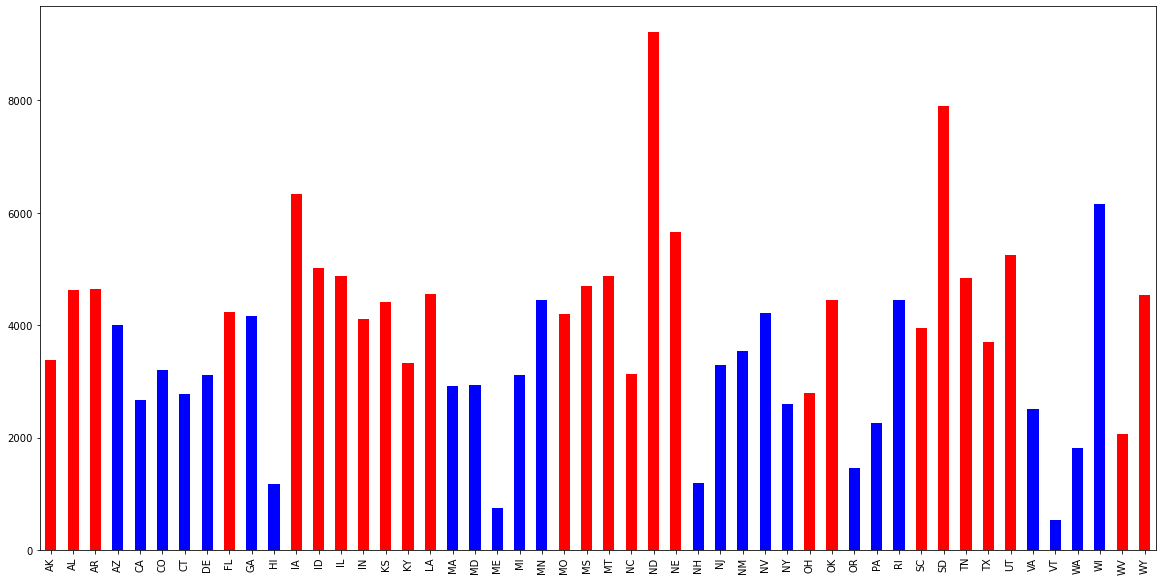

In [78]:
merged_cases_df['case rate per 100000'].plot(
    figsize=(20, 10), 
    kind='bar', 
    color=(merged_cases_df['vote'] == 'dem').map({True: 'b', False: 'r'})
).set_xticklabels(merged_cases_df.state);

In [79]:
def filter_covid(covid_df, single_column):
    df = covid_df[['state', single_column]]
    df = df.rename(columns={single_column: single_column.lower()})
    
    us_territories = ['AS', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI', 'UM', 'DC', 'FM', 'US', 'NYC']
    for territory in us_territories:
        df = df[df['state'] != inverted_dict[territory]]
    df.sort_values('state')

    if len(df.iloc[0]['state']) > 2:
        for i in range(len(df)):
            df.iloc[i]['state'] = us_state_abbrev[df.iloc[i]['state']]

    frames = [df.sort_values('state'), political_df.sort_values('state')]
    df = pd.merge(df, political_df, left_on='state', right_on='state', how='left')
    df = df.sort_values('state')
    
    df[single_column.lower()] = pd.to_numeric(df[single_column.lower()], errors='coerce')  
    
    return df

In [80]:
covid_total_cases_df = filter_covid(covid_df, 'Total Cases')
display(covid_total_cases_df)

,state,total cases,vote
1,AK,24909,rep
0,AL,225910,rep
3,AR,139855,rep
2,AZ,287225,dem
4,CA,1059267,dem
5,CO,182801,dem
6,CT,99381,dem
7,DE,30153,dem
8,FL,901234,rep
9,GA,437156,dem


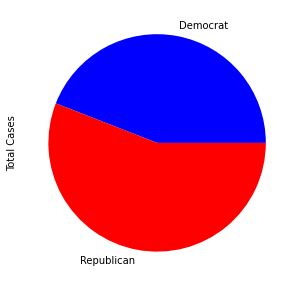

In [81]:
dem_sum = np.sum(covid_total_cases_df[covid_total_cases_df['vote'] == 'dem']['total cases'])
rep_sum = np.sum(covid_total_cases_df[covid_total_cases_df['vote'] == 'rep']['total cases'])
df = pd.DataFrame({'Total Cases': [dem_sum, rep_sum]},
                  index=['Democrat', 'Republican'])
plot = df.plot.pie(y='Total Cases', figsize=(5, 5), colors=['b','r'], legend=None)

In [82]:
# Dataset from: https://covidtracking.com/data/download
time_covid_df = pd.read_csv('datasets/all-states-history.csv')
display(time_covid_df)

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-11-19,AK,A,101.0,101.0,1,NaN,593.0,593.0,139.0,...,898799.0,13241,NaN,NaN,NaN,NaN,NaN,0,898799.0,13241
1,2020-11-19,AL,A,3419.0,3123.0,72,296.0,23295.0,23295.0,1315.0,...,1496717.0,15049,NaN,NaN,68847.0,NaN,NaN,0,1496717.0,15049
2,2020-11-19,AR,A+,2297.0,2105.0,22,192.0,8268.0,8268.0,891.0,...,1552450.0,14667,NaN,21856.0,NaN,107231.0,NaN,0,1552450.0,14667
3,2020-11-19,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-11-19,AZ,A+,6384.0,5919.0,19,465.0,23871.0,23871.0,1796.0,...,2037288.0,18293,354092.0,NaN,NaN,NaN,2037288.0,18293,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14668,2020-01-24,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
14669,2020-01-23,MA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,2.0,1,NaN,NaN,NaN,NaN,NaN,0,2.0,1
14670,2020-01-23,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
14671,2020-01-22,MA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,0,1.0,1


In [83]:
def filter_covid_2(covid_df, columns):
    df = covid_df[[*columns]]
    for i in range(len(columns)):
        df = df.rename(columns={columns[i]: columns[i].lower()})
    
    us_territories = ['AS', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI', 'UM', 'DC', 'FM', 'US', 'NYC']
    for territory in us_territories:
        df = df[df['state'] != inverted_dict[territory]]
    df.sort_values('state')

    if len(df.iloc[0]['state']) > 2:
        for i in range(len(df)):
            df.iloc[i]['state'] = us_state_abbrev[df.iloc[i]['state']]

    frames = [df.sort_values('state'), political_df.sort_values('state')]
    df = pd.merge(df, political_df, left_on='state', right_on='state', how='left')
    df = df.sort_values('state')
    
    return df

In [84]:
viral_time_df = filter_covid_2(time_covid_df, ['date', 'state', 'hospitalized',])
viral_time_df = viral_time_df[viral_time_df['hospitalized'].notna()]
viral_time_df['date'] = pd.to_datetime(viral_time_df['date'])
viral_time_df['hospitalized'] = pd.to_numeric(viral_time_df['hospitalized'], errors='coerce')  
display(viral_time_df)
print(len(viral_time_df[viral_time_df['state'] == 'AK']))
print(len(viral_time_df[viral_time_df['state'] == 'WI']))

,date,state,hospitalized,vote
0,2020-11-19,AK,593.0,rep
5432,2020-08-14,AK,193.0,rep
5376,2020-08-15,AK,197.0,rep
5320,2020-08-16,AK,203.0,rep
5264,2020-08-17,AK,206.0,rep
...,...,...,...,...
3359,2020-09-21,WY,247.0,rep
8455,2020-06-22,WY,105.0,rep
6663,2020-07-24,WY,155.0,rep
2575,2020-10-05,WY,294.0,rep


256
234


In [85]:
df_list = []
for i, k in enumerate(us_state_abbrev):
    df_list.append(viral_time_df[viral_time_df['state'] == us_state_abbrev[k]].sort_values('date'))

In [86]:
def generate_state_dict(vote):
    states_dict = {}
    counter = 0
    for temp_df in df_list:
        if not temp_df['state'].empty and len(temp_df['hospitalized'].to_list()) >= 200:
            if temp_df['vote'].iloc[0] == vote:
                states_dict[temp_df['state'].iloc[0]] = temp_df['hospitalized'].to_list()[:200]
                counter += 1
    return states_dict

Text(0, 0.5, 'Hospitalizations')

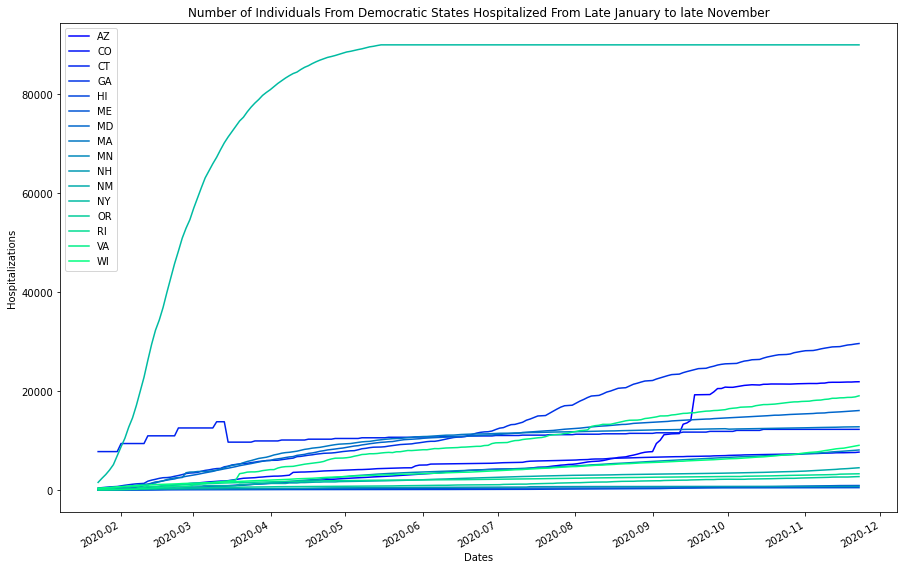

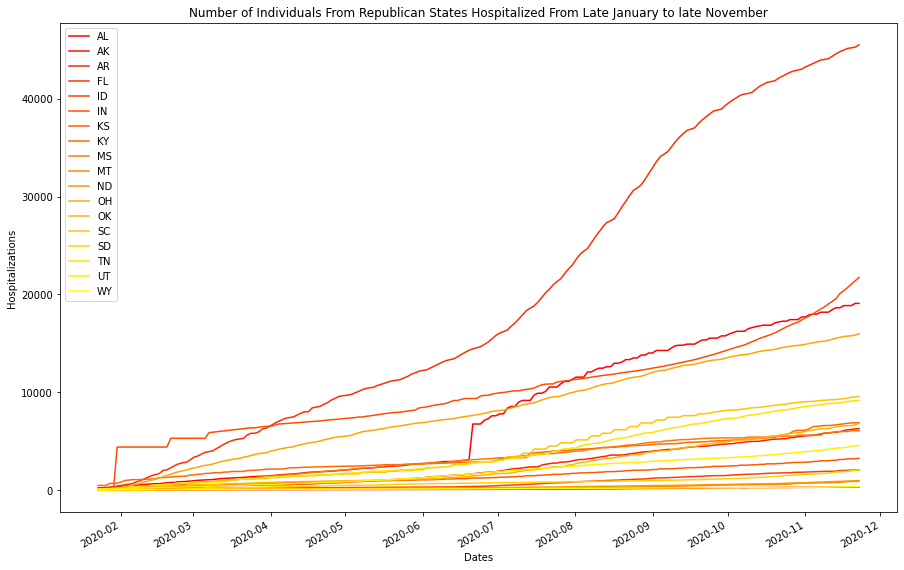

In [87]:
def generate_line_plot(vote):
    datelist = pd.date_range(start=datetime(2020,1,23), end=datetime.today(), periods=200).tolist()
    states_dict = generate_state_dict(vote)
    df = pd.DataFrame(states_dict, index=datelist)
    cmap = cm.get_cmap('winter') if vote == 'dem' else cm.get_cmap('autumn')
    return df.plot.line(figsize=(15, 10), cmap=cmap)

dem_line_plot = generate_line_plot('dem')
dem_line_plot.set_title('Number of Individuals From Democratic States Hospitalized From Late January to late November')
dem_line_plot.set_xlabel('Dates')
dem_line_plot.set_ylabel('Hospitalizations')

rep_line_plot = generate_line_plot('rep')
rep_line_plot.set_title('Number of Individuals From Republican States Hospitalized From Late January to late November')
rep_line_plot.set_xlabel('Dates')
rep_line_plot.set_ylabel('Hospitalizations')

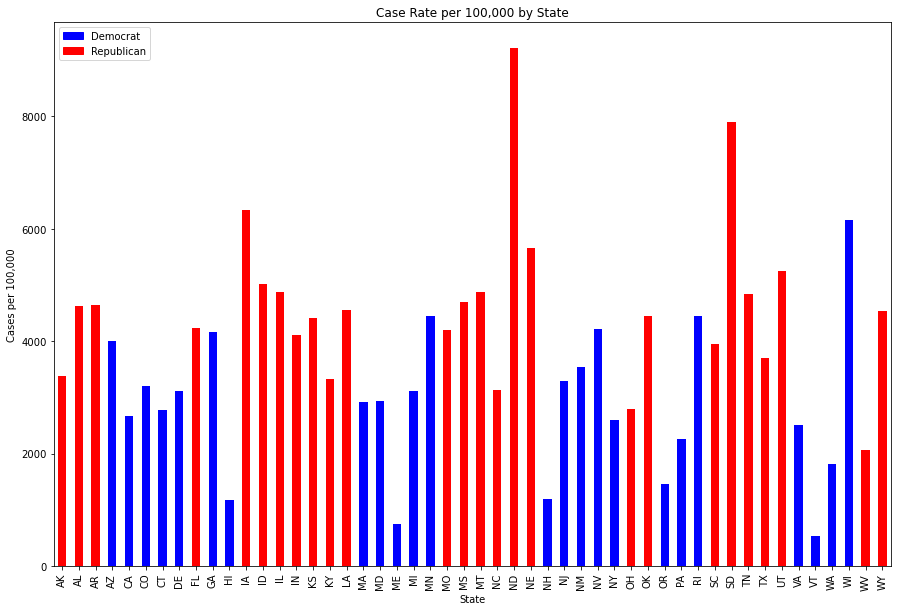

In [118]:
bar_plot = merged_cases_df['case rate per 100000'].plot(
    figsize=(15, 10), 
    kind='bar', 
    color=(merged_cases_df['vote'] == 'dem').map({True: 'b', False: 'r'})
)
bar_plot.set_xticklabels(merged_cases_df.state);
bar_plot.set_title('Case Rate per 100,000 by State')
bar_plot.set_xlabel('State')
bar_plot.set_ylabel('Cases per 100,000')
handles = [mpatches.Patch(color='blue', label='Democrat'), mpatches.Patch(color='red', label='Republican')]
bar_plot.legend(handles=handles, loc=2)

Text(0.5, 1.0, 'Total Cases for Democratic and Republic States')

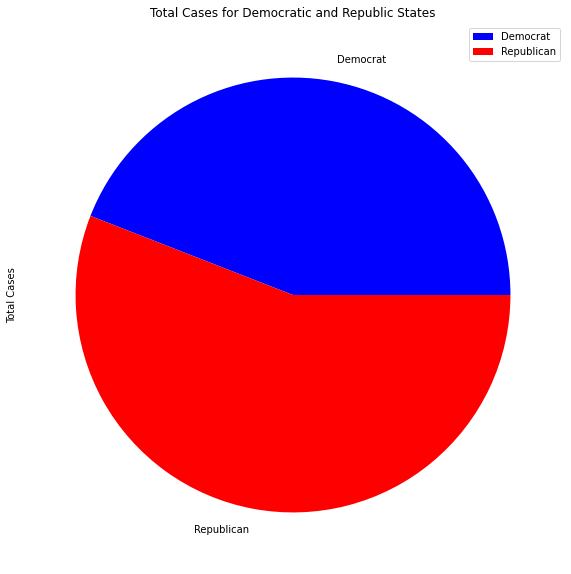

In [89]:
dem_sum = np.sum(covid_total_cases_df[covid_total_cases_df['vote'] == 'dem']['total cases'])
rep_sum = np.sum(covid_total_cases_df[covid_total_cases_df['vote'] == 'rep']['total cases'])
df = pd.DataFrame({'Total Cases': [dem_sum, rep_sum]},
                  index=['Democrat', 'Republican'])
pie_plot = df.plot.pie(y='Total Cases', figsize=(15, 10), colors=['b','r'])
pie_plot.set_title('Total Cases for Democratic and Republic States')

In [90]:
dem_line_figure = dem_line_plot.get_figure()
rep_line_figure = rep_line_plot.get_figure()
bar_figure = bar_plot.get_figure()
pie_figure = pie_plot.get_figure()
figure_list = [dem_line_figure, rep_line_figure, bar_figure, pie_figure]

In [91]:
pdf = matplotlib.backends.backend_pdf.PdfPages("figures.pdf")
for fig in figure_list:
    pdf.savefig(fig)
pdf.close()